In [2]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from matplotlib          import cm
from mpl_toolkits.mplot3d import Axes3D

import scipy.integrate as integrate
import os.path as path
import wget

# Maximum Likelihood estimation

$$ P(A/B) = \frac{P(B/A)P(A)}{P(B)}  $$

$P(A)$ es el prior.  (Hipótesis (Modelos en general)) 

$P(B/A)$ es la probabilidad de $B$ dada la hipótesis $A$. (Likelihood)

$P(B)$ Evidencia, no calculable en general (factor de normalización)

$P(A/B)$ es la probabilidad posterior.

$$ P(A/B) \propto P(B/A)P(A)  $$

Esto puede verse como un proceso de actualización de las probabilidades dada la evidencia!

Objetivo: Encontrar el mejor valor de sigma dada la secuencia de datos observados {$x_{k}$} y la incertidumbre asociada:

$$ prob(\sigma|\{ x_{k}\}) \propto prob(\{ x_{k}\}|\sigma)prob(\sigma)$$

Asumimos la probabilidad de $P(\sigma) = A$, para $1 < \sigma < 10$ y cero en otro caso.

In [6]:
file = 'data.dat'
url = 'https://raw.githubusercontent.com/asegura4488/DataBase/main/MetodosComputacionales/Likelihood.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

3.619291789654469


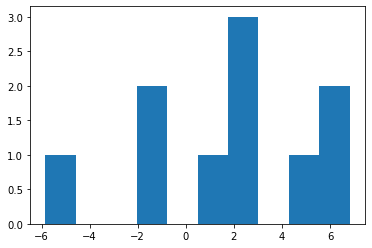

In [8]:
Data = np.loadtxt(Path_)
plt.hist(Data)
print(np.std(Data))

In [9]:
def Likelihood(x,sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp( -0.5*(x/sigma)**2 )

In [10]:
def GetLikelihood(x,sigma):
    
    like = 1.0
    for i in x:
        like *= Likelihood(i,sigma)
        
    return like

In [11]:
sigma = np.linspace(1,10,100)
LikeValue = GetLikelihood(Data,sigma) 

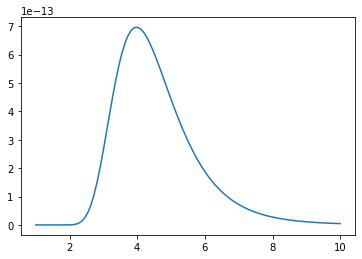

In [13]:
plt.plot(sigma,LikeValue)

In [14]:
def GetDerivative(x,sigma):
    
    h = 0.000001
    d = ( GetLikelihood(Data,sigma+h) - GetLikelihood(Data,sigma-h)   )/(2*h)
    
    return d

In [15]:
Dlikelihood = GetDerivative(Data,sigma)

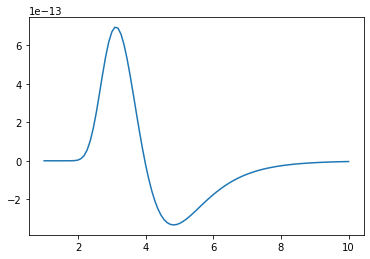

In [16]:
plt.plot(sigma,Dlikelihood)

In [17]:
def Get2Derivative(x, sigma):
    h = 0.000001
    d = (GetDerivative(x,sigma+h) - GetDerivative(x,sigma-h))/(2*h)
    return d

In [18]:
D2likelihood = Get2Derivative(Data,sigma)

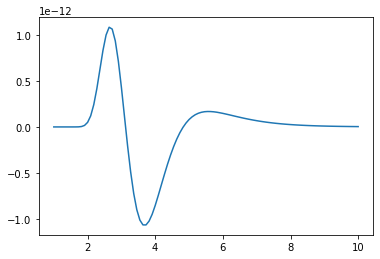

In [19]:
plt.plot(sigma,D2likelihood)

In [22]:
def NewtonRaphson(x,sigmai):
    
    precision = 1e-20
    
    sigman = sigmai
    
    while np.abs( GetDerivative(Data,sigman) ) > precision:
        sigman -= GetDerivative(Data,sigman)/Get2Derivative(Data,sigman)

    return sigman

In [24]:
SigmaValue = NewtonRaphson(Data,4.0)
print(SigmaValue)

3.976052503072015


In [26]:
error = - Get2Derivative(Data,SigmaValue)
print(error)

8.815552170281016e-13


In [27]:
# Necesitamos normalizar al Likelihood

def Like(s):
    return GetLikelihood(Data,s)

In [30]:
def IntegrationQuad(x,sigma_min,sigma_max):
    
    Npoints = 1000
    s = np.linspace(sigma_min,sigma_max,Npoints)
    
    a,b = s[0], s[-1]
    
    integral = integrate.quad(Like,a,b)
    
    return integral[0]

In [32]:
Normalization = IntegrationQuad(Data,1.0,10)
print(Normalization)

1.7051343753418208e-12


In [35]:
error = - Get2Derivative(Data,SigmaValue)/Normalization
print(error, np.sqrt(error))

0.51700043690186 0.7190274243044281


$$ \hat{\sigma} = 3.97 \pm 0.71 $$

Donde los errores son simétricos, porque la distribución prior es gaussiana.

In [34]:
D2Normlizada = Get2Derivative(Data,sigma)/Normalization

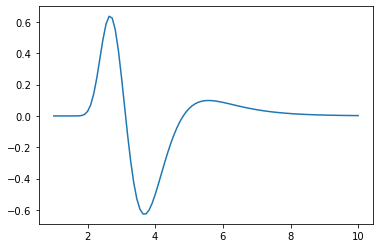

In [37]:
plt.plot(sigma, D2Normlizada)